In [70]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [ ]:
def simulate(B,n, mu = 2, sigma =4, alpha = 0):
    
    matrix = np.random.normal(loc=mu, scale=sigma, size=(n, B))
    if alpha == 0:
        mean = np.mean(matrix, axis=0)
        return mean
    lower_limit = stats.norm.ppf(alpha/2, loc=mu, scale=sigma) # Lower trimming bound
    upper_limit = stats.norm.ppf(1 - alpha/2, loc=mu, scale=sigma)  # Upper trimming bound
    matrix_trimmed = np.where((matrix >= lower_limit) & (matrix <= upper_limit), matrix, np.nan)
    mean = np.nanmean(matrix_trimmed, axis=0)
    return mean

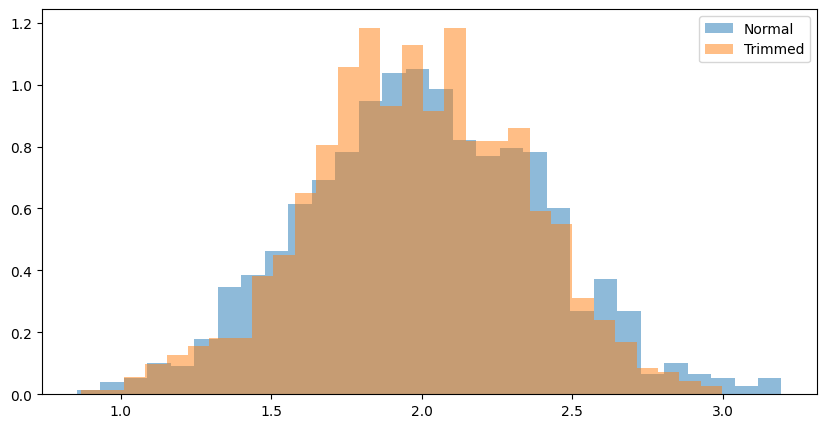

In [100]:
sim = simulate(1000, 100)
sim_trimmed = simulate(1000, 100, alpha=0.05)
plt.figure(figsize=(10,5))
plt.hist(sim, bins=30, density=True,alpha=0.5, label='Normal')
plt.hist(sim_trimmed, bins=30, density=True , alpha=0.5, label='Trimmed')
plt.legend()


In [101]:
#from simulation 
ARE = np.var(sim)/np.var(sim_trimmed)
print(ARE)

1.2372179947274695


In [ ]:
#from analytical solution

from scipy.stats import norm

# Given parameters
mu = 2
sigma = 4
alpha = 0.05
n = 100  # sample size

# Calculate the trimming bounds
beta_1 = norm.ppf(alpha / 2, loc=mu, scale=sigma)  # Lower trimming bound
beta_2 = norm.ppf(1 - alpha / 2, loc=mu, scale=sigma)  # Upper trimming bound

# Compute φ and Φ values
phi_1 = norm.pdf(beta_1)
phi_2 = norm.pdf(beta_2)
Phi_1 = norm.cdf(beta_1)
Phi_2 = norm.cdf(beta_2)

# Calculate the variance of the trimmed mean
var_trimmed = (1/(1-2*alpha))*(sigma**2)*(1 - ((beta_2*phi_2 + beta_1*phi_1) /(Phi_2 - Phi_1))-((phi_2 - phi_1)**2 / (Phi_2 - Phi_1)**2))

# Variance of the sample mean
var_sample_mean = sigma**2 / n

# Calculate the Asymptotic Relative Efficiency (ARE)
ARE = var_sample_mean / var_trimmed

# Print the results
print("Asymptotic Relative Efficiency (ARE):", ARE)

Asymptotic Relative Efficiency (ARE): 0.008999999175893945
